In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification, AutoTokenizer


## EDA

In [9]:
train_df = pd.read_csv("data/train.csv")
train_df["word_length"] = train_df["full_text"].apply(lambda t: len(t.split()))

In [10]:
train_df.shape

(3911, 9)

In [11]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_length
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234


In [12]:
train_df.describe()


,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_length
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053,430.492969
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450,191.868449
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,294.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,402.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,526.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1260.000000


In [13]:
train_df.isna().sum(axis=0)

text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
word_length    0
dtype: int64

In [14]:
train_df["cohesion"].value_counts()

3.0    1096
3.5     988
2.5     790
4.0     534
2.0     315
4.5     125
1.5      27
5.0      26
1.0      10
Name: cohesion, dtype: int64

array([[<AxesSubplot:title={'center':'cohesion'}>,
        <AxesSubplot:title={'center':'syntax'}>,
        <AxesSubplot:title={'center':'vocabulary'}>],
       [<AxesSubplot:title={'center':'phraseology'}>,
        <AxesSubplot:title={'center':'grammar'}>,
        <AxesSubplot:title={'center':'conventions'}>],
       [<AxesSubplot:title={'center':'word_length'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

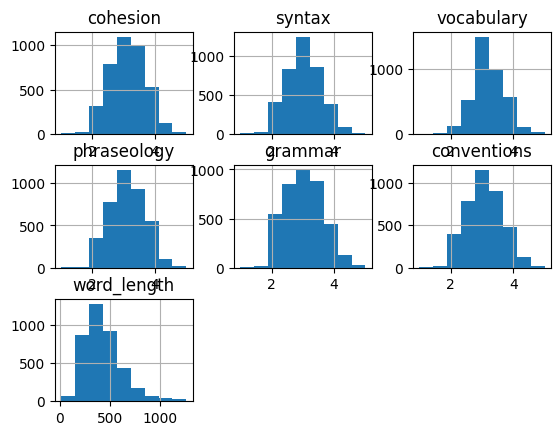

In [15]:
train_df.hist(bins=9)

## Logistic Regression

In [16]:
train_df, val_df = train_test_split(train_df)
print(f"train shape: {train_df.shape}, val_shape: {val_df.shape}")


train shape: (2933, 9), val_shape: (978, 9)


In [17]:
label_col = "vocabulary"
vectorizer = CountVectorizer()

train_x = vectorizer.fit_transform(train_df["full_text"])
train_y = train_df[label_col].astype(str)

val_x = vectorizer.transform(val_df["full_text"])
val_y = val_df[label_col].astype(str)
assert train_x.shape[1] == val_x.shape[1]


In [18]:
log_reg = LogisticRegression().fit(train_x, train_y)
log_reg.score(train_x, train_y)


/home/dskel/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8666893965223321

In [19]:
log_reg.score(val_x, val_y)


0.3486707566462168

In [20]:
metrics.accuracy_score(val_y, val_y.shape[0] * ["3.0"])


0.4059304703476483

## Tiny Bert

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny-mnli")
model = AutoModelForSequenceClassification.from_pretrained("prajjwal1/bert-tiny-mnli")


def preprocess_function(examples):
    return tokenizer(examples["full_text"], truncation=True)


test = load_dataset("csv", data_files=["data/test.csv"])
train = load_dataset("csv", data_files=["data/train.csv"])

tokenized_train = train.map(preprocess_function, batched=True)